In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import os
import random

import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
VacinationCountries =pd.read_csv('/kaggle/input/vaccination/country_vaccinations.csv')


In [4]:
VacinationCountries.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
VacinationCountries.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
count,86512,86512,86512,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000,86512,86512,86512
unique,223,223,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,81,119
top,Norway,NOR,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://covid19.who.int/
freq,482,482,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7608,26822,25951
mean,NaN,NaN,NaN,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157,NaN,NaN,NaN
std,NaN,NaN,NaN,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000,NaN,NaN,NaN


In [6]:
# Handle missing values
VacinationCountries = VacinationCountries.dropna(subset=['total_vaccinations', 'country'])

# Convert date to datetime
VacinationCountries['date'] = pd.to_datetime(VacinationCountries['date'])

In [56]:
countries = ['Saudi Arabia', 'Pakistan', 'Malaysia']
anova_data = VacinationCountries[VacinationCountries['country'].isin(countries)]

In [57]:
# Group by country and get mean total vaccinations
anova_groups = [anova_data[anova_data['country'] == c]['total_vaccinations'].dropna() for c in countries]


In [58]:
from scipy import stats

f_stat, p_value = stats.f_oneway(*anova_groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.6f}")


F-statistic: 185.848
P-value: 0.000000


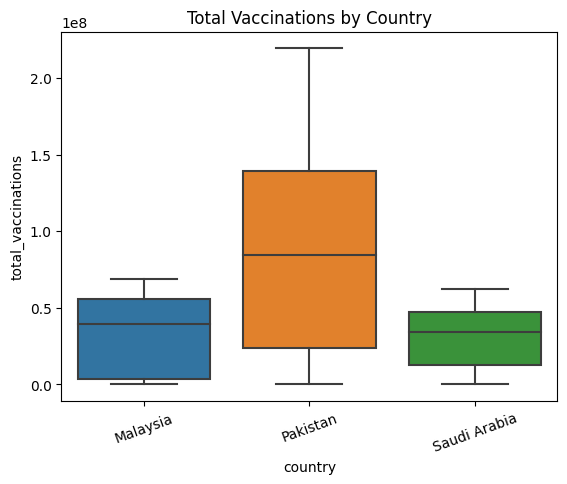

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='country', y='total_vaccinations', data=anova_data)
plt.title('Total Vaccinations by Country')
plt.xticks(rotation=20)
plt.show()


In [60]:
import pandas as pd

VacinationCountries = pd.read_csv('/kaggle/input/vaccination/country_vaccinations.csv')
VacinationCountries['date'] = pd.to_datetime(VacinationCountries['date'])
VacinationCountries = VacinationCountries.dropna(subset=['total_vaccinations'])


In [61]:
# Average total vaccinations per country
country_mean = VacinationCountries.groupby('country')['total_vaccinations'].mean().reset_index()
country_mean = country_mean.sort_values('total_vaccinations', ascending=False)


In [62]:
print(country_mean.head(10))


            country  total_vaccinations
41            China        1.842734e+09
91            India        7.557016e+08
212   United States        3.291165e+08
27           Brazil        1.838771e+08
92        Indonesia        1.192998e+08
100           Japan        1.034202e+08
93             Iran        9.140852e+07
151        Pakistan        8.907890e+07
75          Germany        8.511535e+07
211  United Kingdom        8.337476e+07


In [63]:
from scipy import stats
from itertools import combinations

countries = country_mean['country'].tolist()
nonsignificant_pairs = []

for c1, c2 in combinations(countries, 2):
    group1 = VacinationCountries[VacinationCountries['country'] == c1]['total_vaccinations']
    group2 = VacinationCountries[VacinationCountries['country'] == c2]['total_vaccinations']

    # Only compare if both have enough data
    if len(group1) > 5 and len(group2) > 5:
        f_stat, p_value = stats.f_oneway(group1, group2)
        if p_value >= 0.05:
            nonsignificant_pairs.append((c1, c2, round(p_value, 4)))

print("Country pairs with NO significant difference (p >= 0.05):")
for pair in nonsignificant_pairs[:20]:  # show first 20
    print(pair)


Country pairs with NO significant difference (p >= 0.05):
('Indonesia', 'Japan', 0.0507)
('Japan', 'Iran', 0.1701)
('Japan', 'Pakistan', 0.0619)
('Iran', 'Pakistan', 0.7571)
('Iran', 'Germany', 0.2949)
('Iran', 'United Kingdom', 0.0907)
('Iran', 'Russia', 0.0872)
('Pakistan', 'Germany', 0.4624)
('Pakistan', 'United Kingdom', 0.2051)
('Pakistan', 'Russia', 0.1609)
('Germany', 'United Kingdom', 0.6088)
('Germany', 'Russia', 0.3722)
('United Kingdom', 'Russia', 0.5919)
('United Kingdom', 'Turkey', 0.0637)
('Russia', 'Turkey', 0.2738)
('Turkey', 'Mexico', 0.239)
('Mexico', 'France', 0.5453)
('Mexico', 'England', 0.4415)
('France', 'England', 0.9035)
('France', 'Italy', 0.0788)


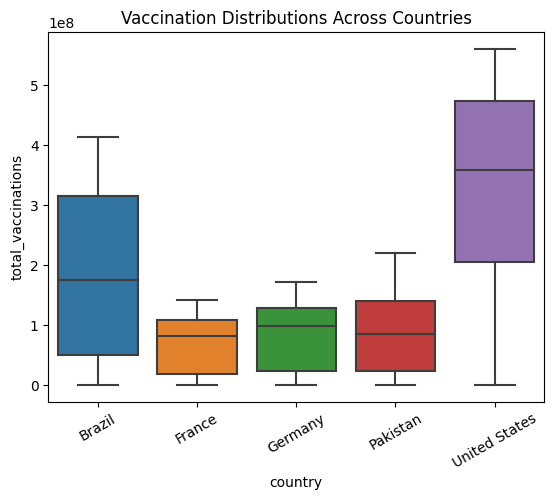

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='country', y='total_vaccinations',
            data=VacinationCountries[VacinationCountries['country'].isin(['United States','Pakistan','Brazil','Germany','France'])])
plt.xticks(rotation=30)
plt.title('Vaccination Distributions Across Countries')
plt.show()
